In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/tabular-playground-series-may-2021/train.csv")

In [3]:
strs = df['target'].value_counts()
strs

Class_2    57497
Class_3    21420
Class_4    12593
Class_1     8490
Name: target, dtype: int64

In [4]:
value_map = dict((v, i) for i,v in enumerate(strs.index))
value_map = {'Class_1': 0, 'Class_2': 1, 'Class_3': 2, 'Class_4': 3}
value_map

{'Class_1': 0, 'Class_2': 1, 'Class_3': 2, 'Class_4': 3}

In [ ]:
df = df.replace({'target':value_map})
df = df.drop(columns=['id'])

In [ ]:
df1 = df.sample(frac=0.6) # 按0.6比例随机采样
df1

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
26942,1,1,0,0,0,0,0,0,0,1,0,0,0,0,8,6,0,0,3,0,0,1,0,1,4,0,0,7,0,0,0,10,0,1,2,0,0,0,9,0,0,1,0,0,0,0,0,0,0,0,0
42836,0,0,0,0,0,0,1,0,0,0,0,0,1,0,9,2,0,0,1,1,0,0,0,0,1,5,0,7,1,0,0,0,0,0,0,0,0,0,8,0,1,0,1,0,0,0,0,0,3,0,2
6853,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,1,3,0,0,0,0,1,0,0,0,0,0,0,5,0,0,2,0,0,0,2,0,0,2,0,0,0,0,1,0,1,0,1
98606,0,0,0,0,0,0,0,1,0,5,0,0,0,0,11,0,0,0,0,1,0,3,0,0,0,4,0,0,0,0,0,-1,0,0,0,0,1,0,3,0,0,4,0,0,0,0,0,0,1,0,1
33738,0,0,0,2,1,0,0,5,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,2,7,0,0,0,0,1,0,0,0,0,5,0,0,0,0,0,0,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33013,8,0,0,1,2,0,0,0,0,0,3,0,0,0,9,0,0,2,0,0,0,1,0,0,1,5,0,0,0,0,0,11,0,0,0,12,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
7139,0,6,0,0,0,0,0,0,0,1,0,0,1,0,3,0,0,0,1,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,23,0,8,0,0,0,0,0,1,0,0,0,2
19579,0,0,0,0,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,3,0,0,4,0,0,0,3,0,0,0,6,0,0,0,0,0,0,0,1
43241,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,1,0,1,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1


In [ ]:
df2=df[~df.index.isin(df1.index)]
df2

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,1
1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,0
3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,1,0,0,0,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,0,0,1,0,0,6,0,0,3,0,0,0,0
99996,0,0,0,0,0,0,0,1,2,0,0,0,0,0,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,3,0,1,0,0,0,7,0,0,0,2,0,0,0,10,0,0,0,1
99997,0,0,0,0,0,1,0,0,0,4,0,0,3,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,4,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,2,0,2
99998,0,0,0,0,1,0,0,0,0,5,0,0,0,0,2,0,0,0,3,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,4,0,1


In [ ]:
x_train = df.iloc[:, :-1]
y_train = df['target']

In [ ]:
x_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0
1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0
3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,1,0,0,0,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,0,0,1,0,0,6,0,0,3,0,0,0
99996,0,0,0,0,0,0,0,1,2,0,0,0,0,0,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,3,0,1,0,0,0,7,0,0,0,2,0,0,0,10,0,0,0
99997,0,0,0,0,0,1,0,0,0,4,0,0,3,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,4,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,2,0
99998,0,0,0,0,1,0,0,0,0,5,0,0,0,0,2,0,0,0,3,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,4,0


In [ ]:
# train
from sklearn.model_selection import GridSearchCV

In [ ]:
# cv_params = {'n_estimators': [400, 500, 600, 700, 800]}
# other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
#          'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
# model = xgb.XGBRegressor(**other_params)
# optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
# optimized_GBM.fit(x_train, y_train)
# evalute_result = optimized_GBM.grid_scores_
# print('每轮迭代运行结果:{0}'.format(evalute_result))
# print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
# print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

In [ ]:
import xgboost as xgb
cv_params = {'n_estimators': [400, 450], }
other_params = {'learning_rate': 0.1, 'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
         'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1, 
         'tree_method': 'auto'}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='f1_weighted', cv=3, verbose=1, n_jobs=4)
optimized_GBM.fit(x_train, y_train)
evalute_result = optimized_GBM.cv_results_
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:  1.6min finished


每轮迭代运行结果:{'mean_fit_time': array([59.0741713 , 44.65844433]), 'std_fit_time': array([ 0.20351128, 14.23537762]), 'mean_score_time': array([0.94193983, 0.59994745]), 'std_score_time': array([0.0159946 , 0.18407752]), 'param_n_estimators': masked_array(data=[400, 450],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 400}, {'n_estimators': 450}], 'split0_test_score': array([0.45790269, 0.46055042]), 'split1_test_score': array([0.45420407, 0.45115003]), 'split2_test_score': array([0.45209861, 0.45060144]), 'mean_test_score': array([0.45473512, 0.45410063]), 'std_test_score': array([0.00239908, 0.00456619]), 'rank_test_score': array([1, 2], dtype=int32)}
参数的最佳取值：{'n_estimators': 400}
最佳模型得分:0.4547351234629047


In [5]:
df = pd.read_csv("../datasets/tabular-playground-series-may-2021/test.csv")
# df = df.drop(columns=['id'])
x_test = df.iloc[:, 1:] # keep the id column for output

In [6]:
x_test

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,0,0,0,0,0,4,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,2,0,7,7,...,3,0,1,0,0,0,1,0,2,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,6,0
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,6,9,14,3
4,0,0,0,0,0,0,1,0,4,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,1,5,0,...,0,1,0,0,0,3,0,0,3,0
49996,0,0,0,0,0,0,10,0,0,0,...,0,0,0,1,0,0,0,0,0,3
49997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,1,0,0,0,0,4,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=400, min_child_weight=1, seed=0, subsample=0.8, colsample_bytree=0.8, gamma=0, reg_alpha=0, reg_lambda=1, silent=False, objective='multi:softmax', nthread=-1)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=-1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              silent=False, subsample=0.8, verbosity=1)

In [ ]:
proba = model.predict_proba(x_test)

# acc = accuracy_score(y_test, y_pred) * 100
# print("\nTesting Accuracy: {:.3f} %".format(acc))

In [ ]:
proba

array([[0.0901335 , 0.56914026, 0.20701343, 0.1337128 ],
       [0.06752943, 0.7165255 , 0.1289737 , 0.08697137],
       [0.07902388, 0.6400273 , 0.18803619, 0.09291267],
       ...,
       [0.09445478, 0.51115656, 0.23221263, 0.16217601],
       [0.0901673 , 0.57500535, 0.16635075, 0.16847657],
       [0.1203045 , 0.54811317, 0.22719307, 0.10438928]], dtype=float32)

In [ ]:
y_train

0        1
1        0
2        0
3        3
4        1
        ..
99995    0
99996    1
99997    2
99998    1
99999    2
Name: target, Length: 100000, dtype: int64

In [ ]:
output = pd.DataFrame({'id': df['id'], 'Class_1': proba[:,0], 'Class_2':proba[:,1], 'Class_3':proba[:,2], 'Class_4':proba[:,3]})
output.to_csv('my_submission_xgb.csv', index=False)

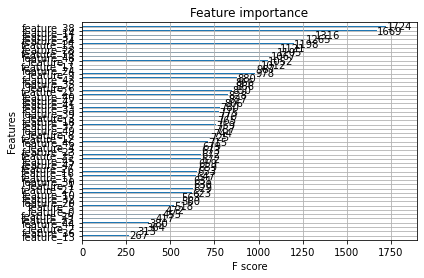

In [ ]:
from matplotlib import pyplot as plt
from xgboost import plot_importance
# 显示重要特征
plot_importance(model)
plt.show()

In [ ]:
type(x_train)

pandas.core.frame.DataFrame

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
2415,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,6,0,6,5,0,10,0,0,0,0,0,0
11828,1,0,0,0,2,0,0,16,0,0,0,0,0,0,1,0,0,0,4,0,0,2,0,0,0,4,4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,4,3,0
50763,0,0,0,6,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,0,4,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,3,0,0,1,0,3,1
33168,1,0,0,3,0,0,0,5,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,7,0,0,3,2,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0
16043,0,0,0,2,0,0,0,0,17,0,0,1,0,0,15,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,5,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26991,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,8,21,0,0,4,0,0,0,1,1,0,0,0,0,0,2,0,0,2,0,0,0,0,12,0,1,0,0,1,0
59399,0,0,0,0,0,0,0,1,0,1,0,5,0,0,7,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1
93599,0,0,0,0,0,0,6,1,0,0,0,0,0,0,0,2,2,3,0,0,0,0,0,0,0,3,13,0,2,0,0,0,0,0,4,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0
31116,0,0,0,0,0,0,6,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,7,0,0,0,1,1,0,1,1,0,0,0,0,0,0,2,0


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
